In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
brexit_data = pd.read_csv('brexit_postcodes.csv')
income_data = pd.read_csv('income_postcodes.csv')
imd_data = pd.read_csv('imd.csv')
price_data = pd.read_csv('HESTIA/samuel/Area_mean.csv',header=0,names=['PC_0','Price'])

In [106]:
print(brexit_data.shape[0])
print(income_data.shape[0])
print(imd_data.shape[0])
print(price_data.shape[0])

2995
2995
2321
2391


In [107]:
brexit_data = brexit_data.set_index('PC_0').join(price_data.set_index('PC_0'))
income_data = income_data.set_index('PC_0').join(price_data.set_index('PC_0'))
imd_data = imd_data.set_index('PC_0').join(price_data.set_index('PC_0'))

In [108]:
brexit_data = brexit_data[~brexit_data['Price'].isnull()]
income_data = income_data[~income_data['Price'].isnull()]
imd_data = imd_data[~imd_data['Price'].isnull()]

In [109]:
print(brexit_data.shape[0])
print(income_data.shape[0])
print(imd_data.shape[0])
print(price_data.shape[0])

2368
2368
2172
2391


In [111]:
#brexit_data = brexit_data.drop_duplicates(subset='REMAIN')
#print(brexit_data)

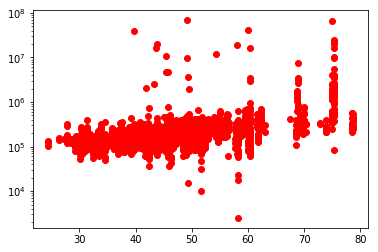

In [142]:
plt.plot(brexit_data['REMAIN'], brexit_data['Price'],'ro')
plt.yscale('log')

In [143]:
brexit_data_area = brexit_data.groupby('LEAVE').mean()

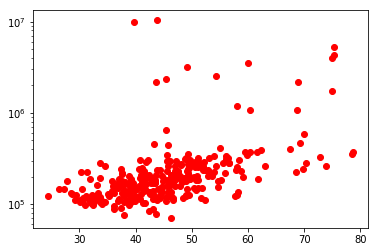

In [144]:
plt.plot(brexit_data_area['REMAIN'], brexit_data_area['Price'],'ro')
plt.yscale('log')

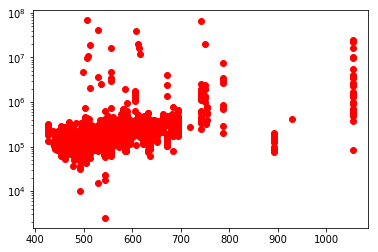

In [113]:
plt.close()
plt.plot(income_data['PAY'], income_data['Price'],'ro')
plt.yscale('log')

In [159]:
income_data_area = income_data.groupby('PAY').mean()
income_data_area = income_data_area.reset_index()

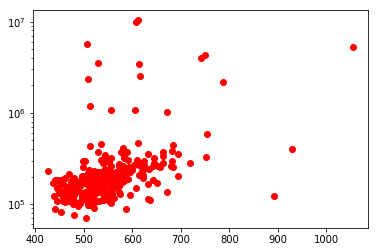

In [160]:
plt.close()
plt.plot(income_data_area['PAY'], income_data_area['Price'],'ro')
plt.yscale('log')

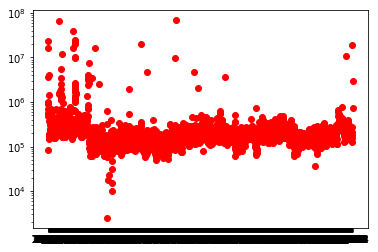

In [161]:
plt.close()
plt.plot(imd_data['index'], imd_data['Price'],'ro')
plt.yscale('log')

In [162]:
imd_data_area = imd_data.groupby('index').mean()
imd_data_area = imd_data_area.reset_index()

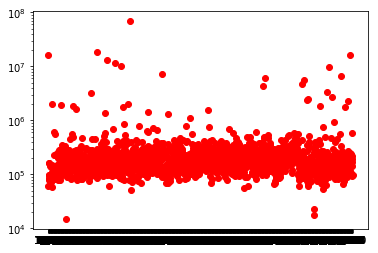

In [163]:
plt.close()
plt.plot(imd_data_area['index'], imd_data_area['Price'],'ro')
plt.yscale('log')